## Data Import

In [41]:
import pandas as pd

# import data from data/ directory
df_train = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')

C:\Users\Jonas\AppData\Local\Temp\ipykernel_18268\2879780261.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train.csv')


## Data overview

In [42]:
df_train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
313701,784,5,2014-10-10,9416,1009,1,1,0,1
923312,878,2,2013-03-26,11049,957,1,1,0,1
187387,68,5,2015-02-13,7213,1059,1,0,0,0
738746,287,6,2013-09-07,8004,802,1,0,0,0
364962,582,6,2014-08-16,5149,644,1,0,0,1


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [44]:
# splitt date into year, month, day
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOfYear'] = df_train['Date'].dt.isocalendar().week

# drop date column
df_train.drop(columns=['Date'], inplace=True)

# sales per customer 
df_train['SalesPerCustomer'] = df_train['Sales'] / df_train['Customers']

df_train.head(15)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118
5,6,5,5651,589,1,1,0,1,2015,7,31,31,9.594228
6,7,5,15344,1414,1,1,0,1,2015,7,31,31,10.851485
7,8,5,8492,833,1,1,0,1,2015,7,31,31,10.194478
8,9,5,8565,687,1,1,0,1,2015,7,31,31,12.467249
9,10,5,7185,681,1,1,0,1,2015,7,31,31,10.550661


In [45]:
# convert stateholiday to int
df_train['StateHoliday'] = df_train['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Store             1017209 non-null  int64  
 1   DayOfWeek         1017209 non-null  int64  
 2   Sales             1017209 non-null  int64  
 3   Customers         1017209 non-null  int64  
 4   Open              1017209 non-null  int64  
 5   Promo             1017209 non-null  int64  
 6   StateHoliday      886137 non-null   float64
 7   SchoolHoliday     1017209 non-null  int64  
 8   Year              1017209 non-null  int32  
 9   Month             1017209 non-null  int32  
 10  Day               1017209 non-null  int32  
 11  WeekOfYear        1017209 non-null  UInt32 
 12  SalesPerCustomer  844340 non-null   float64
dtypes: UInt32(1), float64(2), int32(3), int64(7)
memory usage: 86.3 MB


In [46]:
# count empty values
df_train.isna().sum()

# drop empty values
df_train.dropna(inplace=True)

df_train.isna().sum()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732220 entries, 0 to 1017190
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store             732220 non-null  int64  
 1   DayOfWeek         732220 non-null  int64  
 2   Sales             732220 non-null  int64  
 3   Customers         732220 non-null  int64  
 4   Open              732220 non-null  int64  
 5   Promo             732220 non-null  int64  
 6   StateHoliday      732220 non-null  float64
 7   SchoolHoliday     732220 non-null  int64  
 8   Year              732220 non-null  int32  
 9   Month             732220 non-null  int32  
 10  Day               732220 non-null  int32  
 11  WeekOfYear        732220 non-null  UInt32 
 12  SalesPerCustomer  732220 non-null  float64
dtypes: UInt32(1), float64(2), int32(3), int64(7)
memory usage: 67.7 MB


In [47]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [48]:
# convertz storetype to int
df_store['StoreType'] = df_store['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})

# convert assortment to int
df_store['Assortment'] = df_store['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [49]:
# merge train and store data
df = pd.merge(df_train, df_store, on='Store')

df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0.0,1,2015,7,...,9.482883,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0.0,1,2015,7,...,9.194139,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0.0,1,2015,7,...,9.143403,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0.0,1,2015,7,...,8.948214,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0.0,1,2015,7,...,9.970588,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732220 entries, 0 to 732219
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      732220 non-null  int64  
 1   DayOfWeek                  732220 non-null  int64  
 2   Sales                      732220 non-null  int64  
 3   Customers                  732220 non-null  int64  
 4   Open                       732220 non-null  int64  
 5   Promo                      732220 non-null  int64  
 6   StateHoliday               732220 non-null  float64
 7   SchoolHoliday              732220 non-null  int64  
 8   Year                       732220 non-null  int32  
 9   Month                      732220 non-null  int32  
 10  Day                        732220 non-null  int32  
 11  WeekOfYear                 732220 non-null  UInt32 
 12  SalesPerCustomer           732220 non-null  float64
 13  StoreType                  73

In [51]:
# drop promo2since and promo2sinceweek
df.drop(columns=['Promo2SinceWeek', 'Promo2SinceYear'], inplace=True)

# convert promo2 to int
df['Promo2'] = df['Promo2'].astype(int)

# convert promointerval to int and if empty to 0
df['PromoInterval'] = df['PromoInterval'].map({ 'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})
df['PromoInterval'].fillna(0, inplace=True)

In [52]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval
0,1,5,5263,555,1,1,0.0,1,2015,7,31,31,9.482883,3,1,1270.0,9.0,2008.0,0,0.0
1,1,4,5020,546,1,1,0.0,1,2015,7,30,31,9.194139,3,1,1270.0,9.0,2008.0,0,0.0
2,1,3,4782,523,1,1,0.0,1,2015,7,29,31,9.143403,3,1,1270.0,9.0,2008.0,0,0.0
3,1,2,5011,560,1,1,0.0,1,2015,7,28,31,8.948214,3,1,1270.0,9.0,2008.0,0,0.0
4,1,1,6102,612,1,1,0.0,1,2015,7,27,31,9.970588,3,1,1270.0,9.0,2008.0,0,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732220 entries, 0 to 732219
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      732220 non-null  int64  
 1   DayOfWeek                  732220 non-null  int64  
 2   Sales                      732220 non-null  int64  
 3   Customers                  732220 non-null  int64  
 4   Open                       732220 non-null  int64  
 5   Promo                      732220 non-null  int64  
 6   StateHoliday               732220 non-null  float64
 7   SchoolHoliday              732220 non-null  int64  
 8   Year                       732220 non-null  int32  
 9   Month                      732220 non-null  int32  
 10  Day                        732220 non-null  int32  
 11  WeekOfYear                 732220 non-null  UInt32 
 12  SalesPerCustomer           732220 non-null  float64
 13  StoreType                  73

In [54]:
# value counts for competitionopenmonth
df['CompetitionOpenSinceMonth'].value_counts()

# count empty values
df.isna().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
SalesPerCustomer                  0
StoreType                         0
Assortment                        0
CompetitionDistance            1916
CompetitionOpenSinceMonth    232802
CompetitionOpenSinceYear     232802
Promo2                            0
PromoInterval                     0
dtype: int64

In [55]:
# fill empty values with 0 for competitionopenmonth and competitionopenyear
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

# drop empty values
df.dropna(inplace=True)

# drop open column
df.drop(columns=['Open'], inplace=True)

# drop store column
df.drop(columns=['Store'], inplace=True)


<Axes: >

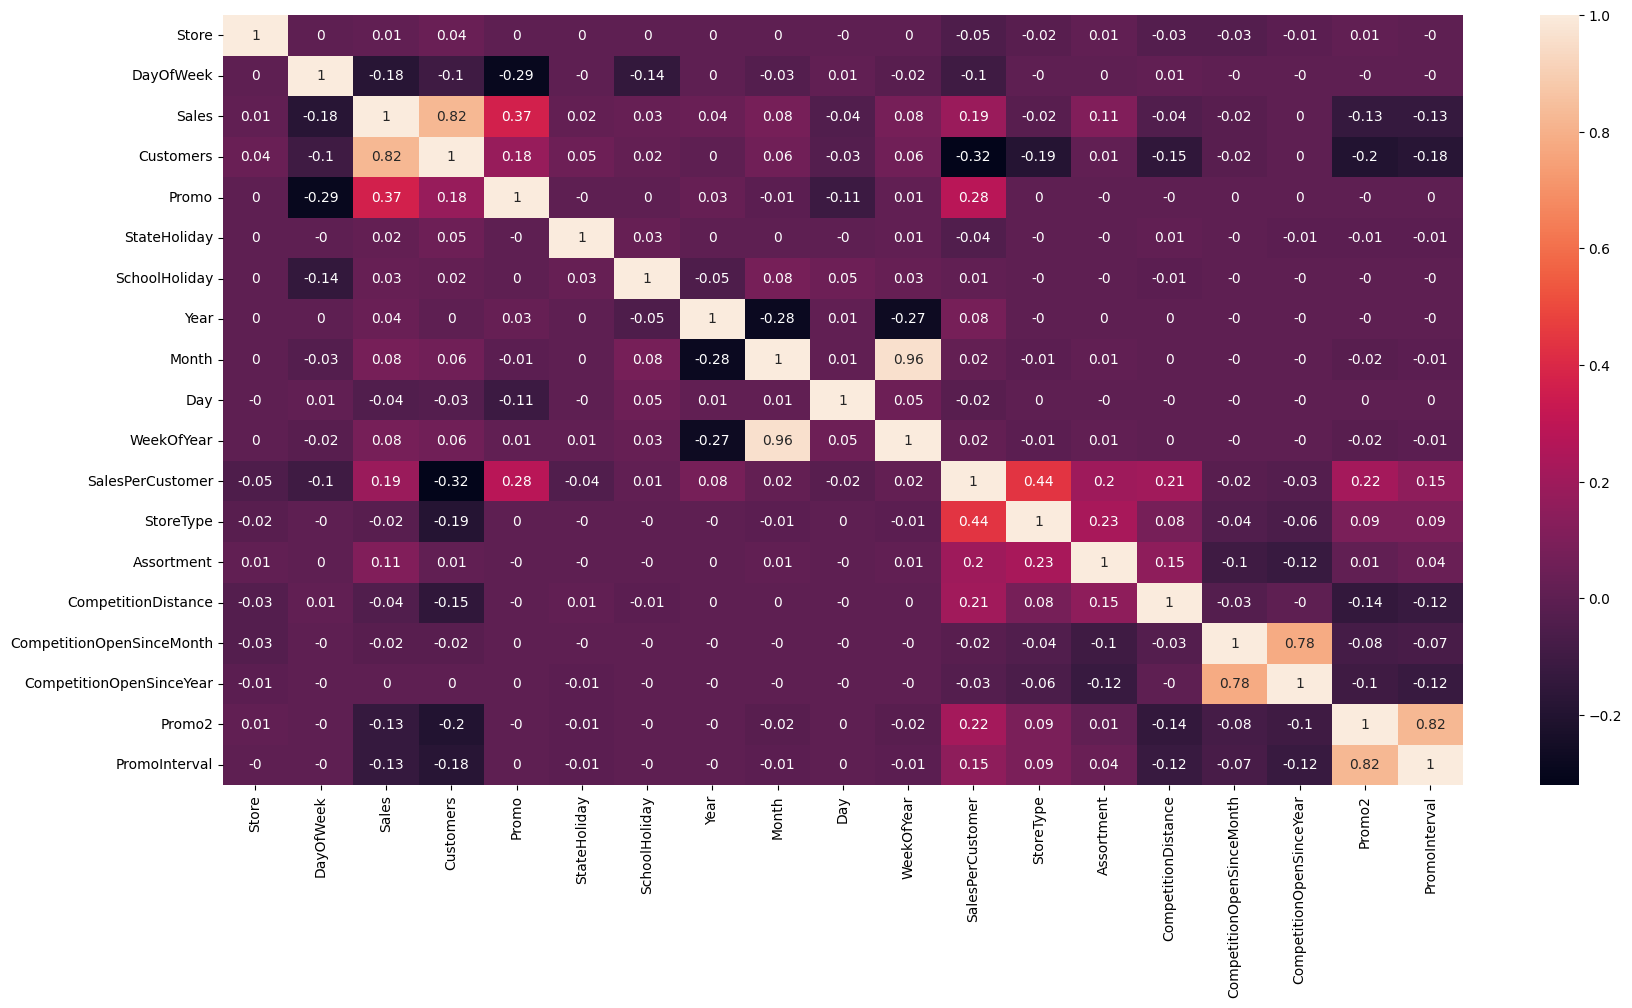

In [56]:
# create correlation matrix
correlation_matrix = df.corr().round(2)

# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True)
